#Transformada de Fourier en Tiempo Continuo (*no periódica*)

Este notebook tiene como objetivo aplicar la **Transformada de Fourier** para el análisis de señales **continuas NO periódicas**, recordando que el resultado es una gráfica **continua NO periódica**.

La señal a analizar es un pulso rectangular. Centrado en el origen, con un determinado tiempo en alto. Modificando la constante `T1` es posible observar el comportamiento del espectro frecuencial.

Recurso utilizado --> [All Types of Fourier Transforms in PYTHON](https://www.youtube.com/watch?v=GKsCWivmlHg)

##Importacion de dependencias

In [45]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy.integrals.transforms import fourier_transform

##Ingreso

Generación de la señal

In [46]:
#Se declara la variable simbólica 't'
t, w = sym.symbols('t, w', real=True)

f = w/(2*sym.pi)

#El ancho del pulso es 2*T1
T1 = 0.5

#Se define el pulso rectangular
xt = sym.Piecewise((0,t < -T1),
                   (1,t < T1),
                   (0,t < 2*T1),
                   (0,True),)

print(f"El ancho del pulso es de {2*T1}. Se activa en {-T1} y se desactiva en {T1}.")

El ancho del pulso es de 1.0. Se activa en -0.5 y se desactiva en 0.5.


##Procedimiento

Para una señal continua NO periódica se utiliza la siguiente expresión para el cálculo del espectro:

$$X(j\omega )= \int_{-\infty}^{\infty}x(t)e^{j\omega t}dt$$

In [47]:
x_TF = fourier_transform(xt, t, f)

Transformada en función de $ω$:

In [48]:
x_TF

Piecewise((2*sin(0.5*w)/w, Ne(w, 0)), (1.0, True))

##Salida

###Gráfica del pulso rectangular

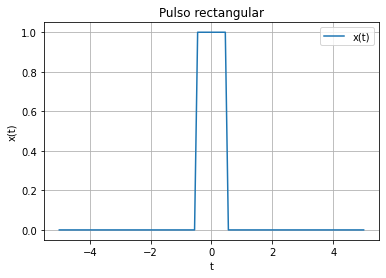

In [49]:
# Para evaluacion numerica
xt = sym.lambdify(t,xt)

# Evaluacion para grafica
time = np.linspace(-5,5,100)
xt = xt(time) 

#Grafica f(t) y Fourier en t
figura, pulso = plt.subplots()
pulso.plot(time, xt, label = 'x(t)')
pulso.set_xlabel('t')
pulso.set_ylabel('x(t)')
pulso.legend()
pulso.grid()
pulso.set_title('Pulso rectangular')
plt.show()

###Gráfica del espectro frecuencial

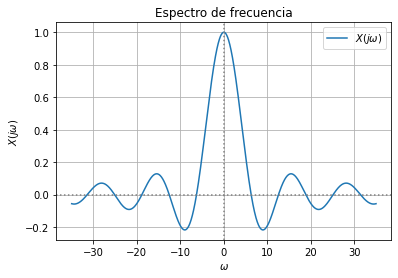

In [50]:
# Para evaluacion numerica
x_TF = sym.lambdify(w,x_TF)

# Evaluacion para grafica
w = np.linspace(-35,35,1000)
x_TF_valores = x_TF(w) 

#Grafica X(jw)
figura, espectro = plt.subplots()
espectro.plot(w, x_TF_valores, label = '$X(j\omega )$')
espectro.set_xlabel('$\omega $')
espectro.set_ylabel('$X(j\omega )$')
espectro.legend()
espectro.grid()
espectro.set_title('Espectro de frecuencia')

plt.axhline(y = 0.0, color = 'grey', linestyle = ':')
plt.axvline(x = 0.0, color = 'grey', linestyle = ':')

plt.show()